In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("hypothyroid.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        3772 non-null   object
 1   sex                        3772 non-null   object
 2   on thyroxine               3772 non-null   object
 3   query on thyroxine         3772 non-null   object
 4   on antithyroid medication  3772 non-null   object
 5   sick                       3772 non-null   object
 6   pregnant                   3772 non-null   object
 7   thyroid surgery            3772 non-null   object
 8   I131 treatment             3772 non-null   object
 9   query hypothyroid          3772 non-null   object
 10  query hyperthyroid         3772 non-null   object
 11  lithium                    3772 non-null   object
 12  goitre                     3772 non-null   object
 13  tumor                      3772 non-null   object
 14  hypopitu

# here we can see all the columns are of object type
## so we need to convert them to int and float types


In [4]:
df.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
0,41,F,f,f,f,f,f,f,f,f,...,t,125,t,1.14,t,109,f,?,SVHC,P
1,23,F,f,f,f,f,f,f,f,f,...,t,102,f,?,f,?,f,?,other,P
2,46,M,f,f,f,f,f,f,f,f,...,t,109,t,0.91,t,120,f,?,other,P
3,70,F,t,f,f,f,f,f,f,f,...,t,175,f,?,f,?,f,?,other,P
4,70,F,f,f,f,f,f,f,f,f,...,t,61,t,0.87,t,70,f,?,SVI,P


# by observing the cells we can see that unknown values are marked with " ? " , so we need to replace it with nan values


In [5]:
df=df.replace("?",np.nan)

In [6]:
df.isnull().sum() # checking null values

age                             1
sex                           150
on thyroxine                    0
query on thyroxine              0
on antithyroid medication       0
sick                            0
pregnant                        0
thyroid surgery                 0
I131 treatment                  0
query hypothyroid               0
query hyperthyroid              0
lithium                         0
goitre                          0
tumor                           0
hypopituitary                   0
psych                           0
TSH measured                    0
TSH                           369
T3 measured                     0
T3                            769
TT4 measured                    0
TT4                           231
T4U measured                    0
T4U                           387
FTI measured                    0
FTI                           385
TBG measured                    0
TBG                          3772
referral source                 0
binaryClass   

In [7]:
df.duplicated().sum()

61

# here we can see that many duplicates and null values exist in data set so we need to clean them

In [8]:
df=df.drop_duplicates()

In [9]:
df[df["age"].isnull()] 

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
1985,NaN,F,t,f,f,f,f,f,t,f,...,t,120,t,0.82,t,146,f,NaN,other,P


# as there is only one nan value in age we can drop it

In [10]:
df.drop(index=[1985],inplace=True)

# age is a number ,but the data type is object so converting it to int
## [ 'TSH', 'T3',  'TT4', 'T4U', 'FTI',  'TBG'] are of decimal type so converting them to float

In [11]:
df["age"]=df["age"].astype(int)
for i in [ 'TSH', 'T3',  'TT4', 'T4U', 'FTI',  'TBG']:
    df[i]=df[i].astype(float)

In [12]:
df.isnull().sum()

age                             0
sex                           149
on thyroxine                    0
query on thyroxine              0
on antithyroid medication       0
sick                            0
pregnant                        0
thyroid surgery                 0
I131 treatment                  0
query hypothyroid               0
query hyperthyroid              0
lithium                         0
goitre                          0
tumor                           0
hypopituitary                   0
psych                           0
TSH measured                    0
TSH                           309
T3 measured                     0
T3                            709
TT4 measured                    0
TT4                           171
T4U measured                    0
T4U                           327
FTI measured                    0
FTI                           325
TBG measured                    0
TBG                          3710
referral source                 0
binaryClass   

### As TBG has all the values as none we can drop it
### We are imputing the numeric columns with mean and sex with mode

In [13]:
df["sex"]=df["sex"].fillna(df["sex"].mode().str[0][0])
for i in ['TSH', 'T3',  'TT4', 'T4U', 'FTI']:
    df[i]=df[i].fillna(df[i].mean())

In [14]:
df.drop("TBG",axis=1,inplace=True)


In [15]:
df.isnull().sum()

age                          0
sex                          0
on thyroxine                 0
query on thyroxine           0
on antithyroid medication    0
sick                         0
pregnant                     0
thyroid surgery              0
I131 treatment               0
query hypothyroid            0
query hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH measured                 0
TSH                          0
T3 measured                  0
T3                           0
TT4 measured                 0
TT4                          0
T4U measured                 0
T4U                          0
FTI measured                 0
FTI                          0
TBG measured                 0
referral source              0
binaryClass                  0
dtype: int64

# EDA

<AxesSubplot: >

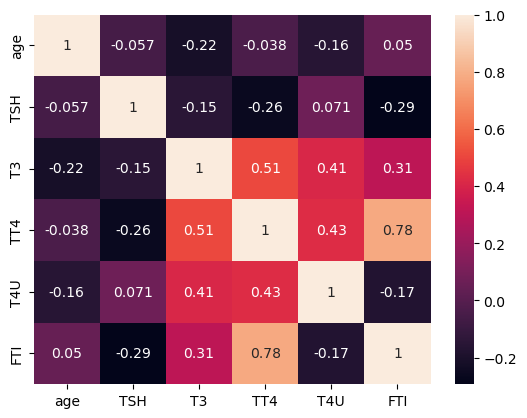

In [16]:
sns.heatmap(df.corr(),annot=True)

### Here we can see that " TT4 " and " FTI " are highly corelated ,so we can drop one of them because of multicolinearity


array([[<AxesSubplot: title={'center': 'age'}>,
        <AxesSubplot: title={'center': 'TSH'}>],
       [<AxesSubplot: title={'center': 'T3'}>,
        <AxesSubplot: title={'center': 'TT4'}>],
       [<AxesSubplot: title={'center': 'T4U'}>,
        <AxesSubplot: title={'center': 'FTI'}>]], dtype=object)

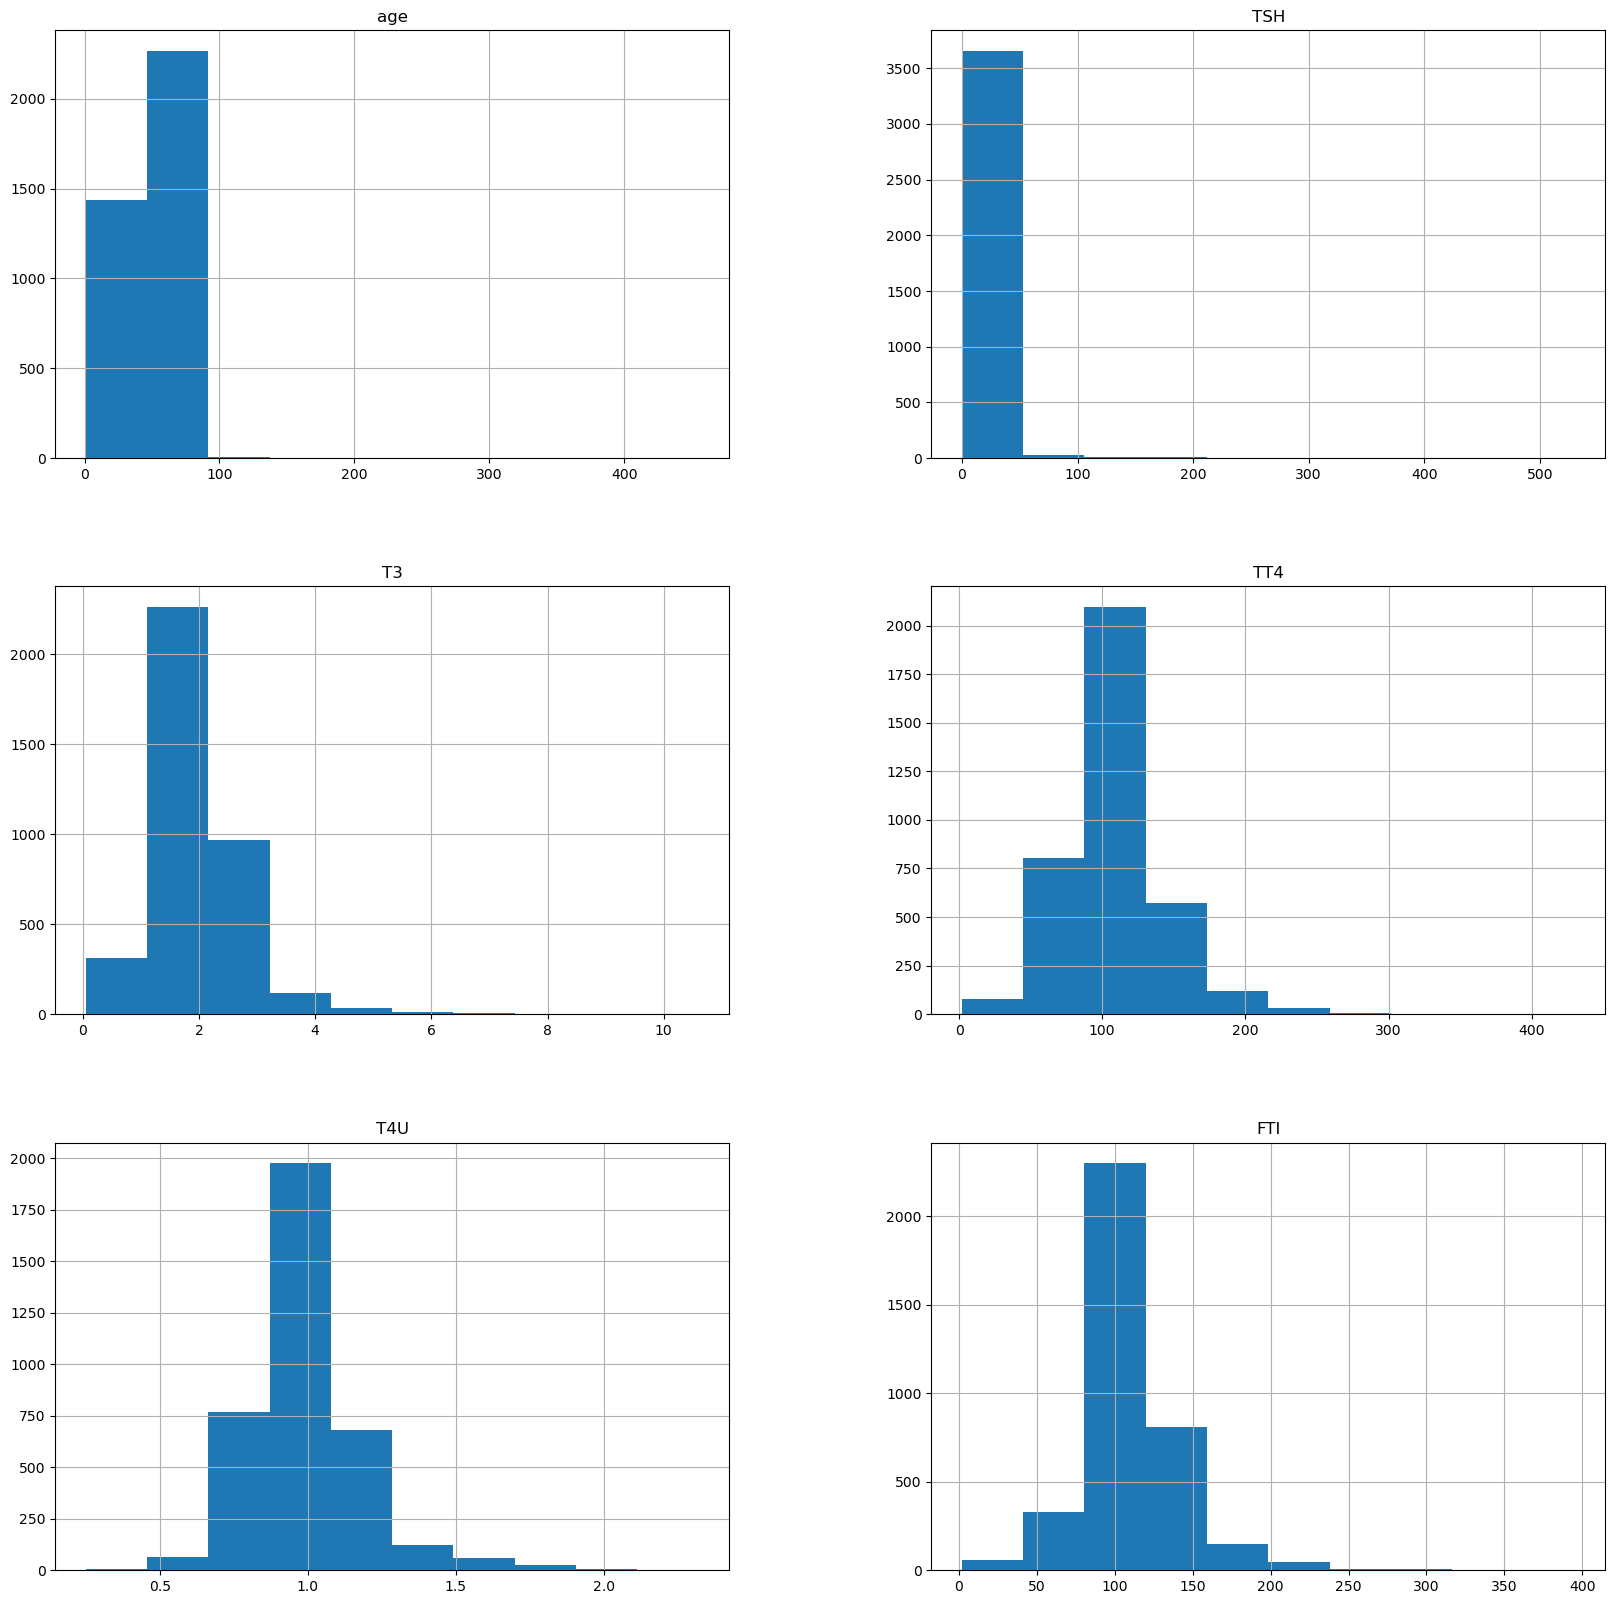

In [17]:
df.hist(figsize=(20,20))

## by the above histograms we can see that the data is distributed normally 

# Data Preprocessing

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3710 entries, 0 to 3771
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        3710 non-null   int64  
 1   sex                        3710 non-null   object 
 2   on thyroxine               3710 non-null   object 
 3   query on thyroxine         3710 non-null   object 
 4   on antithyroid medication  3710 non-null   object 
 5   sick                       3710 non-null   object 
 6   pregnant                   3710 non-null   object 
 7   thyroid surgery            3710 non-null   object 
 8   I131 treatment             3710 non-null   object 
 9   query hypothyroid          3710 non-null   object 
 10  query hyperthyroid         3710 non-null   object 
 11  lithium                    3710 non-null   object 
 12  goitre                     3710 non-null   object 
 13  tumor                      3710 non-null   objec

## we need to encode all the columns 
## and we can drop some unnessary columns

In [19]:
df.columns

Index(['age', 'sex', 'on thyroxine', 'query on thyroxine',
       'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery',
       'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH measured', 'TSH',
       'T3 measured', 'T3', 'TT4 measured', 'TT4', 'T4U measured', 'T4U',
       'FTI measured', 'FTI', 'TBG measured', 'referral source',
       'binaryClass'],
      dtype='object')

In [20]:
df.drop(['TSH measured',
       'T3 measured',  'TT4 measured',  'T4U measured',
       'FTI measured', 'FTI', 'TBG measured', 'referral source'],axis=1,inplace=True)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3710 entries, 0 to 3771
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        3710 non-null   int64  
 1   sex                        3710 non-null   object 
 2   on thyroxine               3710 non-null   object 
 3   query on thyroxine         3710 non-null   object 
 4   on antithyroid medication  3710 non-null   object 
 5   sick                       3710 non-null   object 
 6   pregnant                   3710 non-null   object 
 7   thyroid surgery            3710 non-null   object 
 8   I131 treatment             3710 non-null   object 
 9   query hypothyroid          3710 non-null   object 
 10  query hyperthyroid         3710 non-null   object 
 11  lithium                    3710 non-null   object 
 12  goitre                     3710 non-null   object 
 13  tumor                      3710 non-null   objec

In [22]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in df.columns:
    if df[i].dtype=="O":
        df[i]=le.fit_transform(df[i])

<AxesSubplot: >

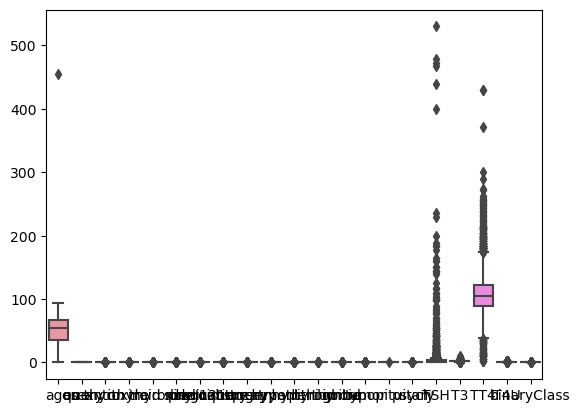

In [23]:
sns.boxplot(df)

In [24]:
#we can see there is a outlier in age ,so we need to remove it

In [25]:
df[df["age"]>=100]

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,lithium,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,binaryClass
1364,455,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1.1,2.0,118.0,1.13,1


In [26]:
df=df.drop(index=[1364])

# Data splitting

In [27]:
X=df.drop("binaryClass",axis=1)
y=df["binaryClass"]

In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=29)

In [29]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((2781, 20), (928, 20), (2781,), (928,))

##### we have divided the data into training data and testing data with 3:1 ratio

# Model Selection

In [30]:
# from the boxplot above we can see the data is verymuch distributed so we need to scale all the features

In [31]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train_scaled=sc.fit_transform(X_train)
X_test=sc.transform(X_test)
X_train=X_train_scaled


In [32]:
from sklearn.svm import SVC
svmc=SVC()
svmc.fit(X_train,y_train)
y_pred=svmc.predict(X_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.9504310344827587
[[ 26  46]
 [  0 856]]
              precision    recall  f1-score   support

           0       1.00      0.36      0.53        72
           1       0.95      1.00      0.97       856

    accuracy                           0.95       928
   macro avg       0.97      0.68      0.75       928
weighted avg       0.95      0.95      0.94       928



In [33]:
from sklearn.tree import DecisionTreeClassifier
tr=DecisionTreeClassifier()
tr.fit(X_train,y_train)
y_pred=tr.predict(X_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))


0.9935344827586207
[[ 72   0]
 [  6 850]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        72
           1       1.00      0.99      1.00       856

    accuracy                           0.99       928
   macro avg       0.96      1.00      0.98       928
weighted avg       0.99      0.99      0.99       928



In [34]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(X_train,y_train)
y_pred=gnb.predict(X_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.125
[[ 70   2]
 [810  46]]
              precision    recall  f1-score   support

           0       0.08      0.97      0.15        72
           1       0.96      0.05      0.10       856

    accuracy                           0.12       928
   macro avg       0.52      0.51      0.12       928
weighted avg       0.89      0.12      0.11       928



In [35]:
from sklearn.naive_bayes import BernoulliNB
gnb=BernoulliNB()
gnb.fit(X_train,y_train)
y_pred=gnb.predict(X_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.9709051724137931
[[ 67   5]
 [ 22 834]]
              precision    recall  f1-score   support

           0       0.75      0.93      0.83        72
           1       0.99      0.97      0.98       856

    accuracy                           0.97       928
   macro avg       0.87      0.95      0.91       928
weighted avg       0.98      0.97      0.97       928



In [36]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
lg.fit(X_train,y_train)
y_pred=lg.predict(X_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.9579741379310345
[[ 35  37]
 [  2 854]]
              precision    recall  f1-score   support

           0       0.95      0.49      0.64        72
           1       0.96      1.00      0.98       856

    accuracy                           0.96       928
   macro avg       0.95      0.74      0.81       928
weighted avg       0.96      0.96      0.95       928



In [37]:
from sklearn.neural_network import MLPClassifier
ml=MLPClassifier()
ml.fit(X_train,y_train)
y_pred=ml.predict(X_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.9892241379310345
[[ 65   7]
 [  3 853]]
              precision    recall  f1-score   support

           0       0.96      0.90      0.93        72
           1       0.99      1.00      0.99       856

    accuracy                           0.99       928
   macro avg       0.97      0.95      0.96       928
weighted avg       0.99      0.99      0.99       928



In [38]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)
y_pred=rfc.predict(X_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.9967672413793104
[[ 72   0]
 [  3 853]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      1.00      1.00       856

    accuracy                           1.00       928
   macro avg       0.98      1.00      0.99       928
weighted avg       1.00      1.00      1.00       928



In [39]:
import pickle 
pickle.dump(tr,open("id3_classifier.pkl","wb"))

In [40]:
pickle.dump(rfc,open("randomf_classifier.pkl","wb"))

In [41]:
pickle.dump(sc,open("scaler.pkl","wb"))

In [42]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.947198275862069
[[ 23  49]
 [  0 856]]
              precision    recall  f1-score   support

           0       1.00      0.32      0.48        72
           1       0.95      1.00      0.97       856

    accuracy                           0.95       928
   macro avg       0.97      0.66      0.73       928
weighted avg       0.95      0.95      0.93       928

